# Kernel PCA
1. Apply Kernel PCA for a dataset given in the url, build a classification model and plot the graph	

In [1]:
#import libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#libarry for feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# #Classification library
from sklearn.linear_model import LogisticRegression
# confusion matix
from sklearn import metrics
from sklearn.decomposition import KernelPCA as KPCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# to creating and reading pickle file
import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# from util import Util_class as obj_util
import importlib.util

In [2]:
# load dataset
dataset = pd.read_csv ("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
# descibe the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [5]:
# handling missing data if nessesary
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
# check for duplicate values
dataset.duplicated().sum()

0

Skewness of y is 0.596902836080957


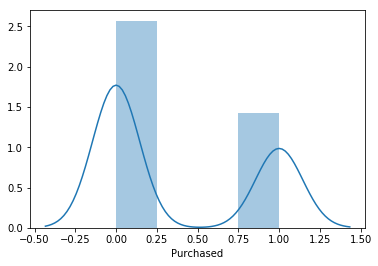

In [7]:
# check skewness for target variable
sb.distplot(dataset['Purchased'])
print ("Skewness of y is {}".format(dataset['Purchased'].skew()))

In [8]:
# import os,sys
# os.mkdir('CSV_files')

In [9]:
# devide the data into # features -> age and estimated salary # label -> purchased
x_data = dataset.iloc[:, [2,3]].values
y_data = dataset.iloc[:,4].values

x_data.shape, y_data.shape

((400, 2), (400,))

### Split dataset

In [10]:
# split dataset into train,test and cross validation , also load these data into csv files 
def splitdata(x,y,size1,size2):
    # split train and test data
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = size1, random_state=0)
    print("x_train : ", x_train.shape, " x_test : ", x_test.shape)

    #Saving testing file into pickle file
    test_file = open("CSV_files/Testing_file.csv","wb")
    pickle.dump(x_test, test_file)
    pickle.dump(y_test, test_file) 
    test_file.close()

    # divide train data into train and cross validation 
    x_train1, x_cv,  y_train1, y_cv = train_test_split(x_train,y_train, test_size = size2,random_state=0)
    print("x_train_data : ", x_train1.shape, " x_crossV_data : ", x_cv.shape)

    return x_train1, x_cv,  y_train1, y_cv
        
x_train, x_cv,  y_train, y_cv = splitdata(x_data,y_data,0.2,0.2)

x_train :  (320, 2)  x_test :  (80, 2)
x_train_data :  (256, 2)  x_crossV_data :  (64, 2)


### Feature scaling 

In [11]:
# Feature Scaling on x_data
def feature_Scaling(x_data, x_cv):
    sc = StandardScaler()
    x_data = sc.fit_transform(x_data)
    x_cv = sc.transform(x_cv)
    return sc, x_data, x_cv
sc, x_train, x_cv = feature_Scaling(x_train, x_cv)

### Applying Kernal PCA and fit the logistic regression model into training

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [13]:
#Applying KPCA
pca = KPCA(n_components=2,kernel='rbf')
x_train = pca.fit_transform(x_train)
x_cv = pca.transform(x_cv)
# explained_varience = pca.explained_variance_ratio_

In [14]:
# fitting logistinc regression to the training set
classifier = LogisticRegression(random_state=0)
classifier = classifier.fit(x_train,y_train)

In [15]:
# predict y data
y_pred = classifier.predict(x_cv)

In [16]:
cm = confusion_matrix(y_cv, y_pred)
print(cm)

[[34  4]
 [ 5 21]]


In [17]:
print(classification_report(y_cv, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.84      0.81      0.82        26

    accuracy                           0.86        64
   macro avg       0.86      0.85      0.85        64
weighted avg       0.86      0.86      0.86        64



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


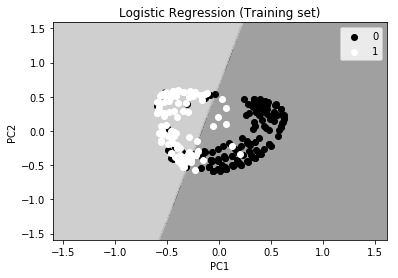

In [18]:
X_set, Y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('0.5', '0.75')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c = ListedColormap(('0', '1'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [19]:
file1 = open('Train_model.pickle','wb')
pickle.dump(classifier, file1)
pickle.dump(sc, file1)
pickle.dump(pca, file1)
file1.close()